In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [71]:
data=pd.read_csv("Data1.csv")

In [72]:
data["Date"] = pd.to_datetime(data['Date'])
df=data[((data['City']=="Delhi") & (data['Date']>='1/1/2020'))]
df.tail()

,City,Latitude,Longitude,Date,SO2,NO2,PMI25,PMI10,O3,CO,AQI,AQI_Quality
9850,Delhi,28.704059,77.1024,2020-04-27,19.4875,18.5000,45.300000,53.02,53.43,38.0,98.0,Satisfactory
9851,Delhi,28.704059,77.1024,2020-04-28,22.0000,21.6875,69.583333,80.36,58.96,43.0,105.0,Moderate
9852,Delhi,28.704059,77.1024,2020-04-29,23.8500,25.1375,91.966667,109.94,58.57,45.5,123.0,Moderate
9853,Delhi,28.704059,77.1024,2020-04-30,21.7750,22.0125,83.266667,110.42,59.55,42.0,128.0,Moderate
9854,Delhi,28.704059,77.1024,2020-05-01,21.4000,33.7250,105.833333,118.82,33.70,48.5,144.0,Moderate


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

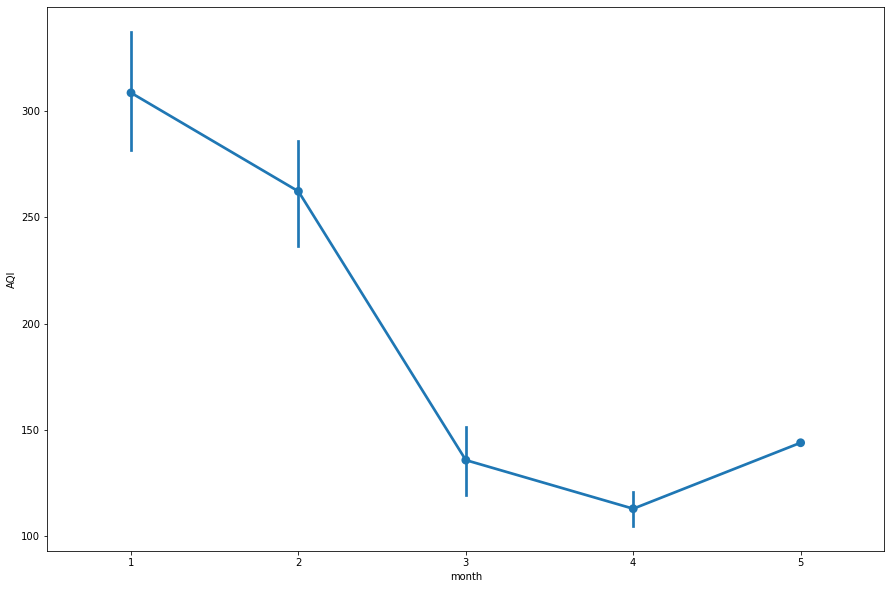

In [73]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%y') # date parse
df['month'] = df['Date'].dt.month # year
df['month'] = df['month'].fillna(0.0).astype(int)
df = df[(df['month']>0)]

data = df[['AQI','month','City']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='month', y='AQI', data=df)

In [74]:
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
data=df[['AQI','Date']]
data["Date"] = pd.to_datetime(data['Date'])
data.tail(20)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,AQI,Date
9835,102.0,2020-04-12
9836,119.0,2020-04-13
9837,134.0,2020-04-14
9838,152.0,2020-04-15
9839,172.0,2020-04-16
9840,123.0,2020-04-17
9841,102.0,2020-04-18
9842,95.0,2020-04-19
9843,115.0,2020-04-20
9844,102.0,2020-04-21


In [75]:
data=data.set_index('Date').resample('D')["AQI"].mean()
data.tail()

Date
2020-04-27     98.0
2020-04-28    105.0
2020-04-29    123.0
2020-04-30    128.0
2020-05-01    144.0
Freq: D, Name: AQI, dtype: float64

In [76]:
df=data.reset_index(level=0, inplace=False)
df = df[np.isfinite(df['AQI'])]
df = df.reset_index(drop=True)
df.head()

,Date,AQI
0,2020-01-01,492.0
1,2020-01-02,485.0
2,2020-01-03,426.0
3,2020-01-04,366.0
4,2020-01-05,354.0


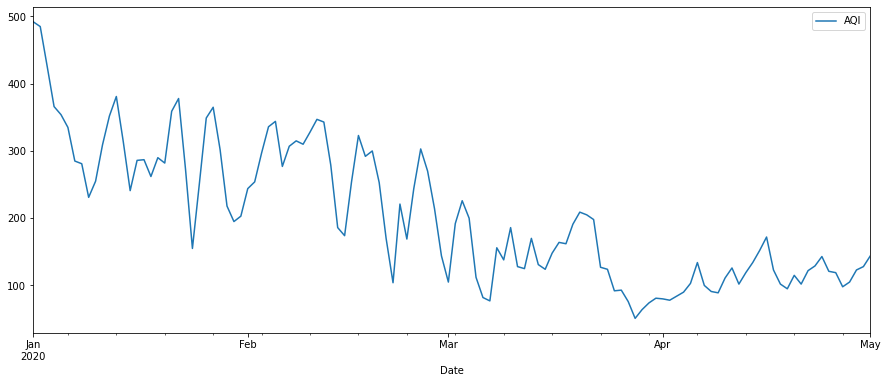

In [77]:
data=df.set_index('Date')
data.sort_values(by='Date',ascending=False)
data.plot(figsize=(15, 6))
plt.show()
y=data.AQI

In [78]:
n = data.shape[0]
train_size = 0.65

features_dataframe = data.sort_values('Date')
train = data.iloc[:int(n * train_size)]
test = data.iloc[int(n * train_size):]

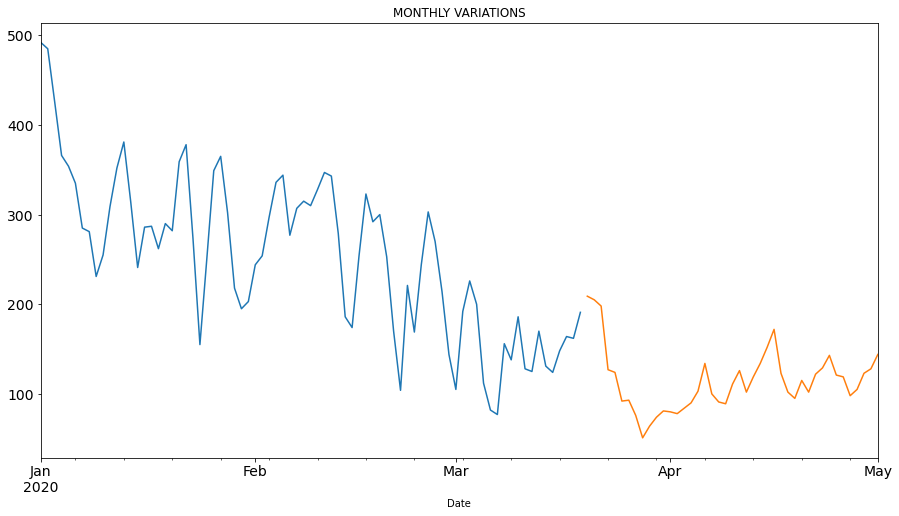

In [79]:
train.AQI.plot(figsize=(15,8), title= 'MONTHY VARIATIONS', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'MONTHLY VARIATIONS', fontsize=14)
plt.show()

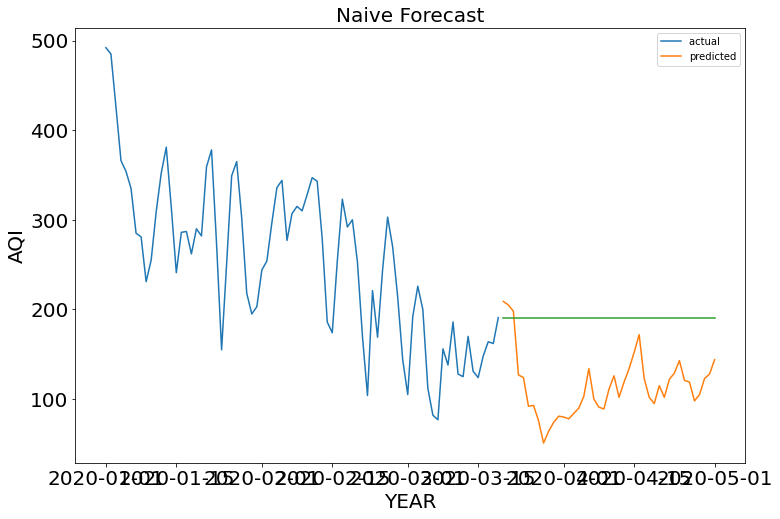

In [80]:
dd= np.asarray(train.AQI)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AQI'], label='Train')
plt.plot(test.index,test['AQI'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=20)

plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()


In [81]:
data=df[['AQI','Date']]

data['Date']=pd.to_datetime(df['Date'])
date=df.groupby(pd.Grouper(key='Date',freq='1MS'))["AQI"].mean()
df.count()


Date    122
AQI     122
dtype: int64

In [82]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['week']= df['Date'].dt.week
df=df[['AQI','Date','month','year','day','week']]
df.tail()

,AQI,Date,month,year,day,week
117,98.0,2020-04-27,4,2020,27,18
118,105.0,2020-04-28,4,2020,28,18
119,123.0,2020-04-29,4,2020,29,18
120,128.0,2020-04-30,4,2020,30,18
121,144.0,2020-05-01,5,2020,1,18


In [83]:
data = df[['AQI','week']].groupby(["week"]).mean().reset_index().sort_values(by='week',ascending=False)
data=data.dropna()
dd=data
data.describe()

,week,AQI
count,18.000000,18.000000
mean,9.500000,206.328571
std,5.338539,95.834741
min,1.000000,84.285714
25%,5.250000,123.214286
50%,9.500000,194.714286
75%,13.750000,287.571429
max,18.000000,424.600000


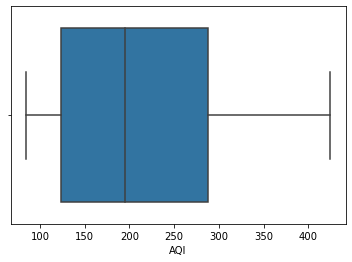

In [84]:
import seaborn as sns
sns.boxplot(x=data['AQI'])

In [85]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >120]
df=df[df.AQI <290]


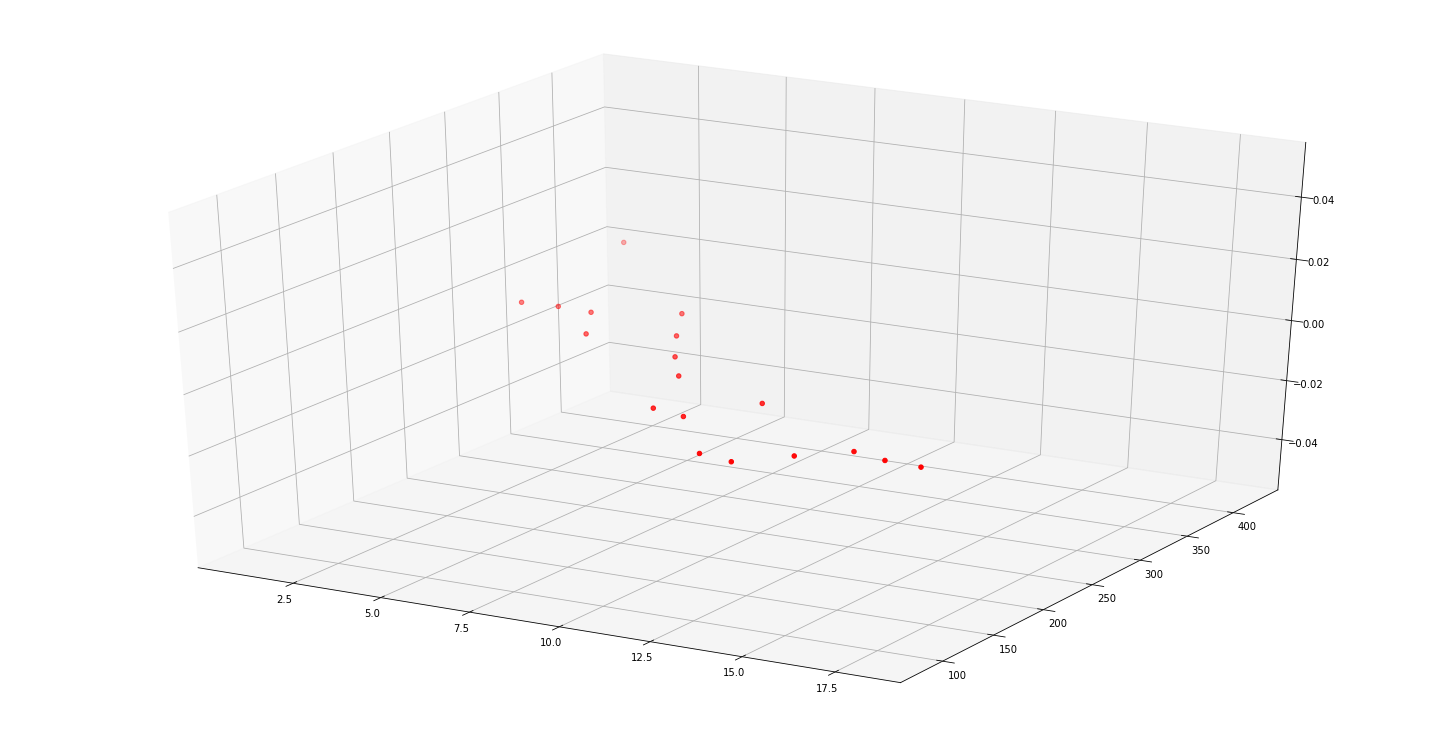

In [86]:
year=data['week'].values
AQI=data['AQI'].values
data['AQI']=pd.to_numeric(data['AQI'],errors='coerce')
data['week']=pd.to_numeric(data['week'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()

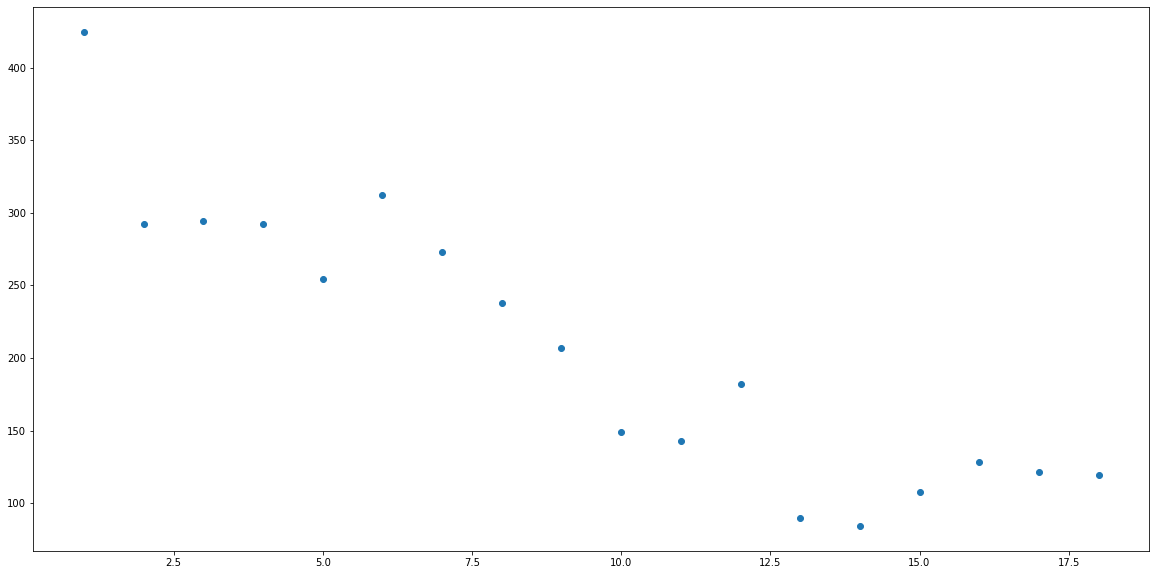

In [87]:
cols =['week']
y = data['AQI']
x=data[cols]

plt.scatter(x,y)
plt.show()

In [88]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.59219588],
       [ 1.        ,  1.40487872],
       [ 1.        ,  1.21756156],
       [ 1.        ,  1.03024439],
       [ 1.        ,  0.84292723],
       [ 1.        ,  0.65561007],
       [ 1.        ,  0.46829291],
       [ 1.        ,  0.28097574],
       [ 1.        ,  0.09365858],
       [ 1.        , -0.09365858],
       [ 1.        , -0.28097574],
       [ 1.        , -0.46829291],
       [ 1.        , -0.65561007],
       [ 1.        , -0.84292723],
       [ 1.        , -1.03024439],
       [ 1.        , -1.21756156],
       [ 1.        , -1.40487872],
       [ 1.        , -1.59219588]])

In [89]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 206.33, -87.21


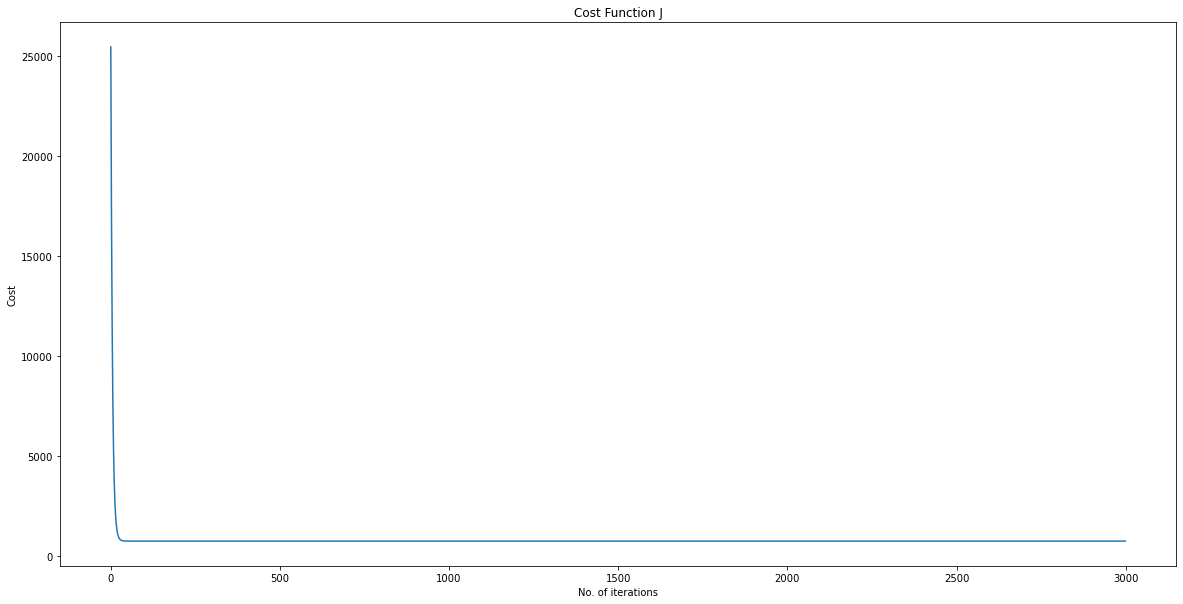

In [90]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [91]:
newB=[ 206.33, -87.21]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse

   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([data, dt], axis=1)
x
x

,week,AQI,Actual,Predicted
17,18,119.600000,119.600000,67.474597
16,17,121.571429,121.571429,83.810527
15,16,128.142857,128.142857,100.146457
14,15,107.571429,107.571429,116.482387
13,14,84.285714,84.285714,132.818316
12,13,89.571429,89.571429,149.154246
11,12,182.428571,182.428571,165.490176
10,11,143.142857,143.142857,181.826105
9,10,149.285714,149.285714,198.162035
8,9,207.000000,207.000000,214.497965


In [92]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

38.61626677173254


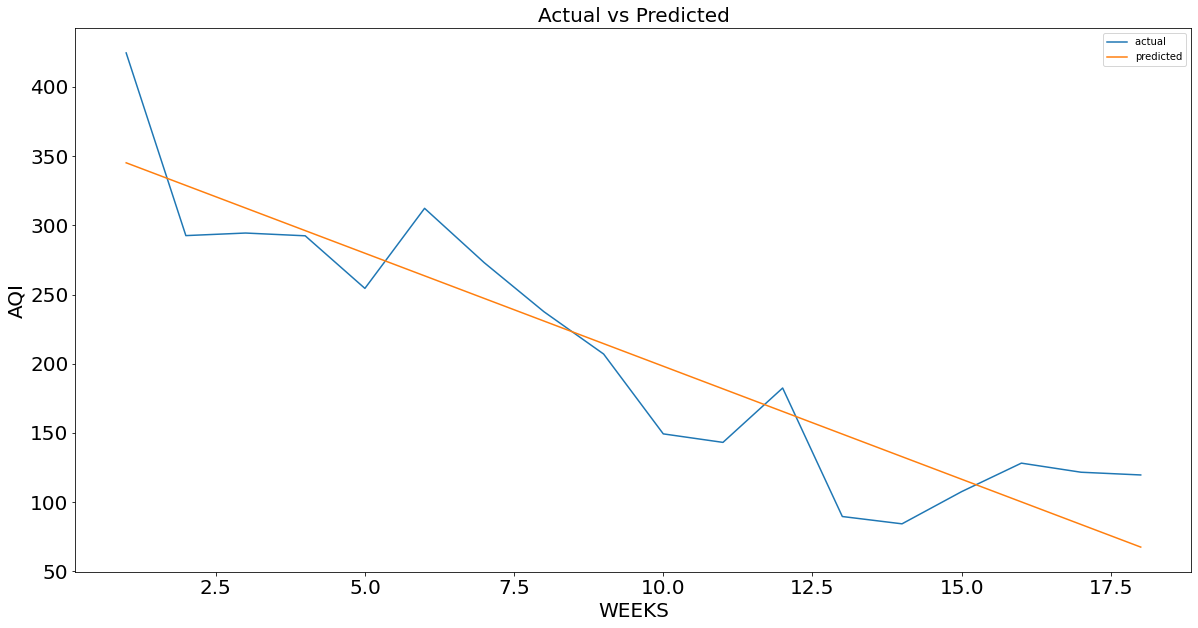

In [93]:
x_axis=x.week
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("WEEKS",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [94]:
df=dd[['week','AQI']]

df=df[df.week>4]
df.describe()

,week,AQI
count,14.0000,14.000000
mean,11.5000,172.134694
std,4.1833,73.122076
min,5.0000,84.285714
25%,8.2500,120.092857
50%,11.5000,146.214286
75%,14.7500,229.928571
max,18.0000,312.285714


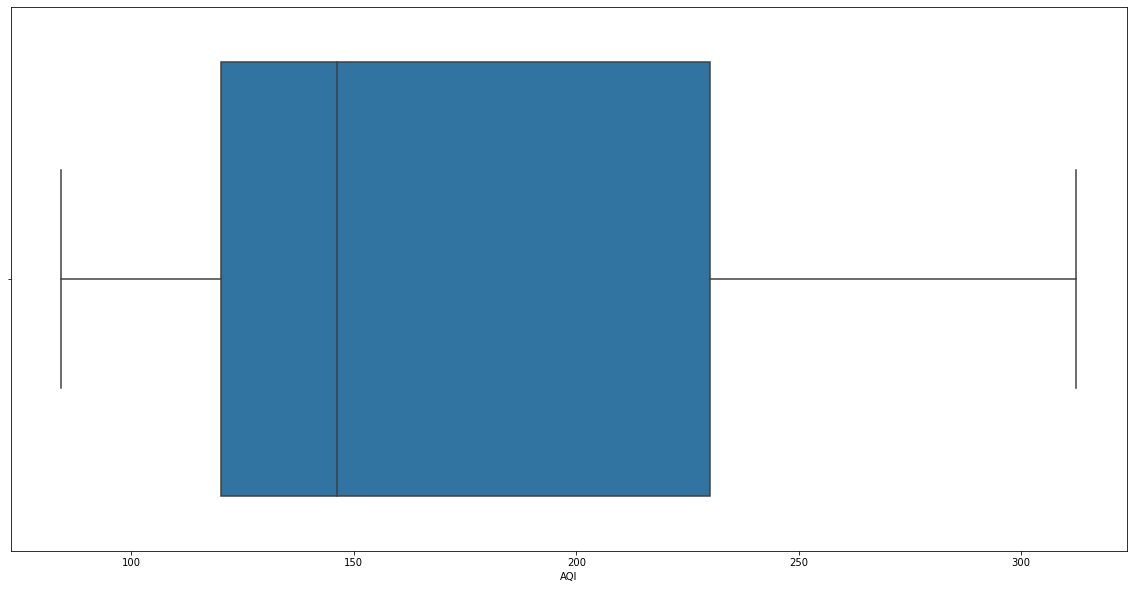

In [95]:
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [96]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >110]
df=df[df.AQI <235]
df

,week,AQI
17,18,119.600000
16,17,121.571429
15,16,128.142857
11,12,182.428571
10,11,143.142857
9,10,149.285714
8,9,207.000000


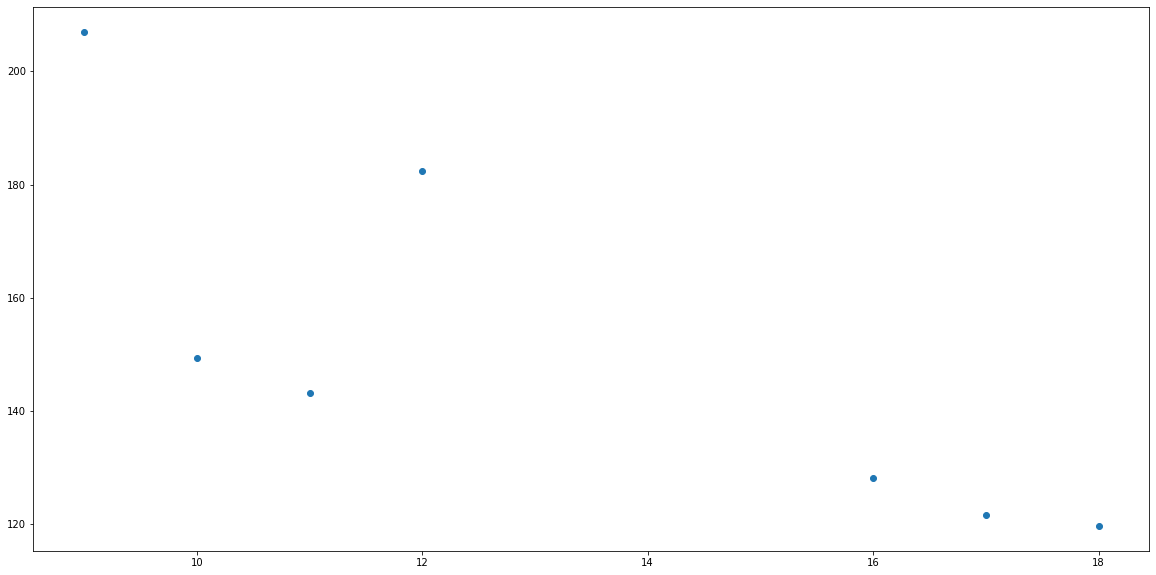

In [97]:
cols =['week']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [98]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.29569609],
       [ 1.        ,  1.02085147],
       [ 1.        ,  0.74600684],
       [ 1.        , -0.35337166],
       [ 1.        , -0.62821629],
       [ 1.        , -0.90306091],
       [ 1.        , -1.17790554]])

In [99]:
#Tunning model with GRADIENT DESCENT

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 150.17, -26.39


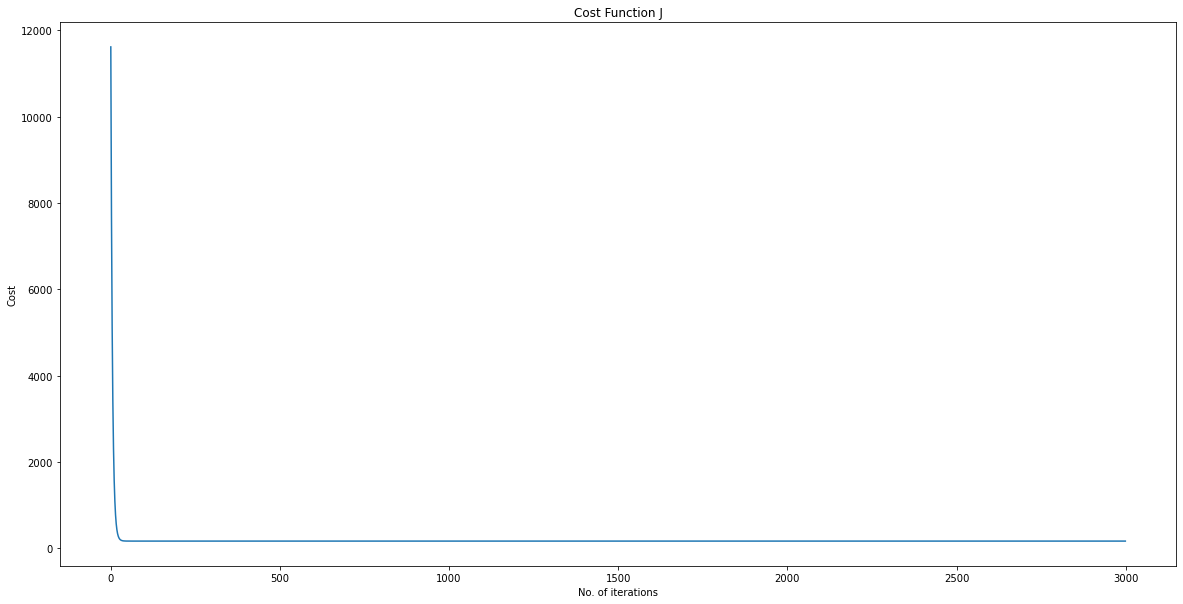

In [100]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [101]:
import numpy as np
newB=[ 155.26, -24.95]

def rmse(y,y_pred):
    rmse= (np.sqrt(np.mean((y-y_pred)**2)))
    return rmse
   
y_pred=x.dot(newB)
dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,week,AQI,Actual,Predicted
17,18,119.600000,119.600000,122.932382
16,17,121.571429,121.571429,129.789756
15,16,128.142857,128.142857,136.647129
11,12,182.428571,182.428571,164.076623
10,11,143.142857,143.142857,170.933996
9,10,149.285714,149.285714,177.791370
8,9,207.000000,207.000000,184.648743


In [102]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

19.169398344884918


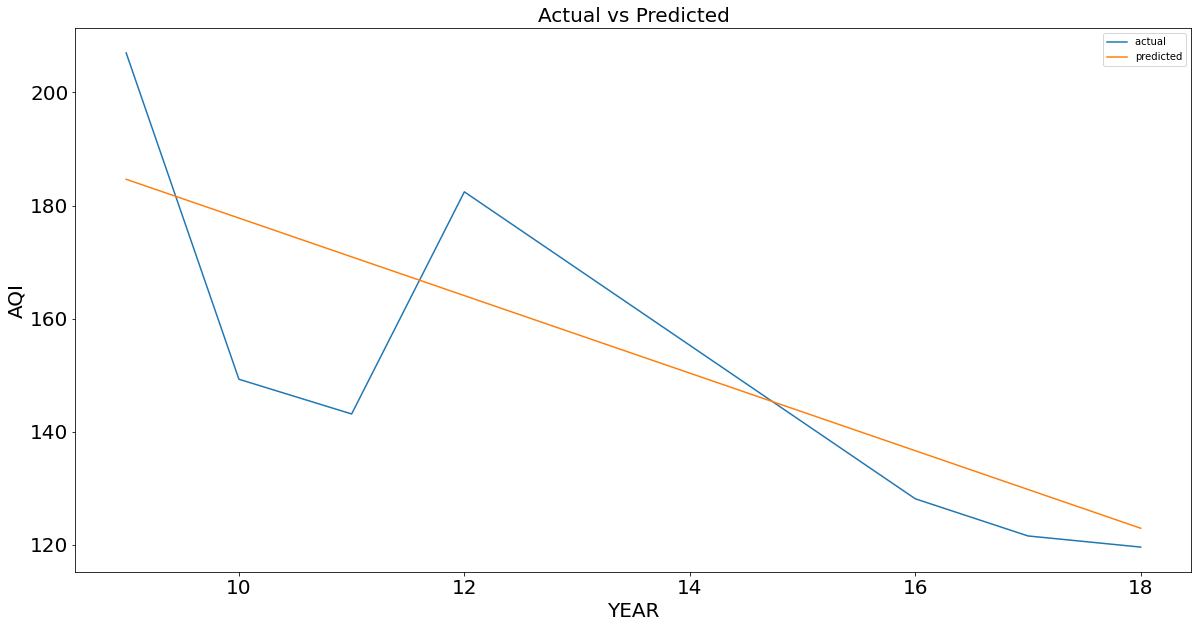

In [103]:
x_axis=x.week
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [104]:
df= dd[['week','AQI']]

#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.week>8]
df.describe()

,week,AQI
count,10.00000,10.000000
mean,13.50000,133.260000
std,3.02765,38.767266
min,9.00000,84.285714
25%,11.25000,110.578571
50%,13.50000,124.857143
75%,15.75000,147.750000
max,18.00000,207.000000


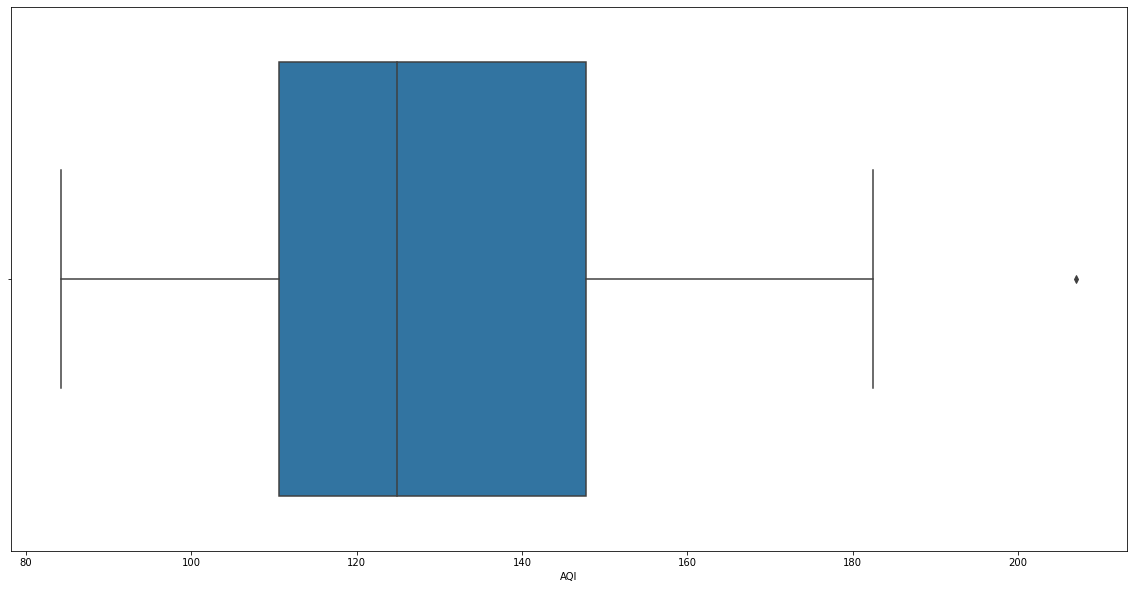

In [105]:
import seaborn as sns
sns.boxplot(x=df['AQI'])


In [106]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >120]
df=df[df.AQI <155]
df.head()

,week,AQI
16,17,121.571429
15,16,128.142857
10,11,143.142857
9,10,149.285714


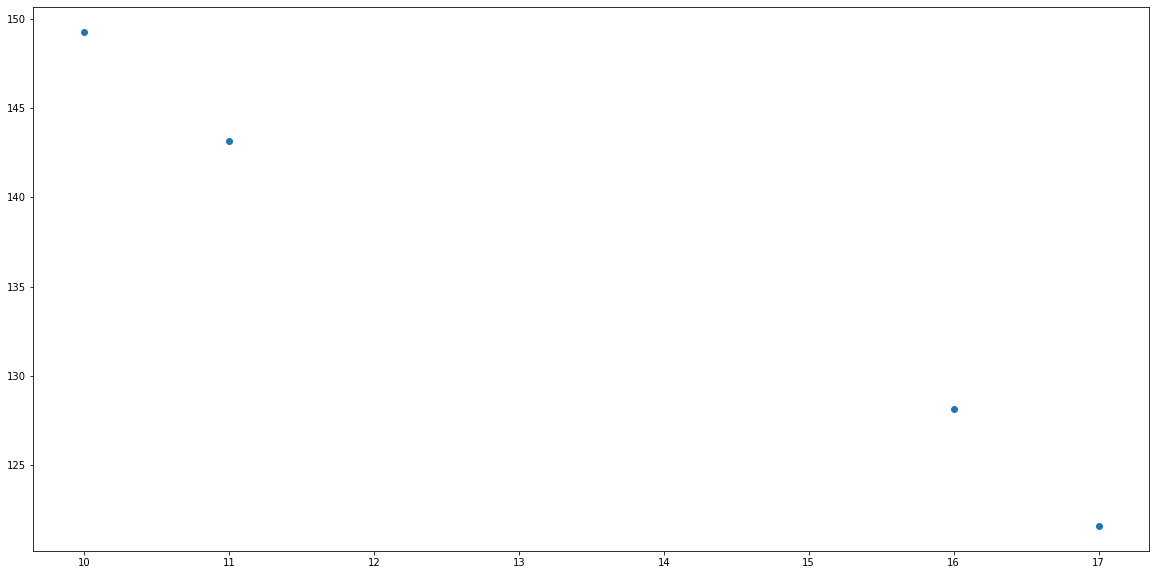

In [107]:
cols =['week']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [108]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.       ,  0.9966159],
       [ 1.       ,  0.7118685],
       [ 1.       , -0.7118685],
       [ 1.       , -0.9966159]])

In [109]:
#Tunning model with GRADIENT DESCENT

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 135.54, -12.77


In [110]:
import numpy as np
newB=[ 135.54, -12.77]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,week,AQI,Actual,Predicted
16,17,121.571429,121.571429,122.813215
15,16,128.142857,128.142857,126.449439
10,11,143.142857,143.142857,144.630561
9,10,149.285714,149.285714,148.266785


In [111]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

1.3839415069359609


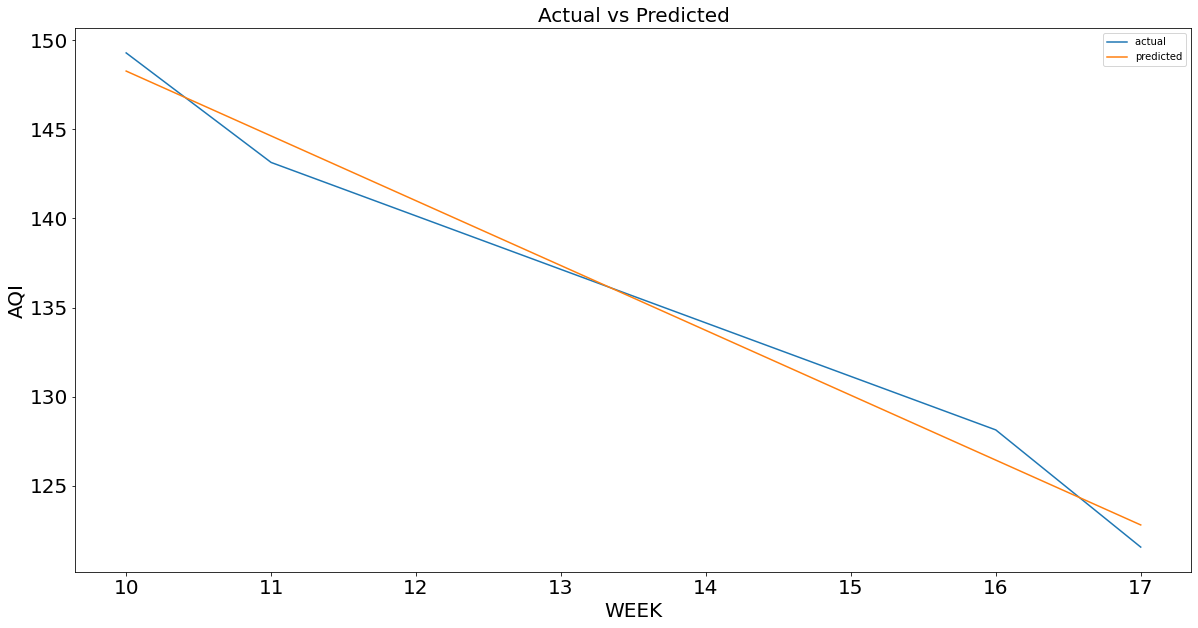

In [112]:
#plotting the actual and predicted results
x_axis=x.week
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("WEEK",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [113]:
#Prediction for the future 
from sklearn.preprocessing import MinMaxScaler

In [114]:
#data=[[-1,19],[-1,20],[-1,21],[-1,22],[-1,23][-1,24],[-1,25],[-1,26],[-1,27],[-1,28],[-1,29],[-1,30],[-1,31],[-1,32],[-1,33],[-1,34],[-1,35],[-1,36],[-1,37],[-1,38],[-1,39],[-1,40],[-1,41],[-1,42],[-1,43],[-1,44],[-1,45],[-1,47],[-1,48],[-1,49],[-1,50],[-1,51],[-1,52],[-1,53]]
data=[[-1,19],[-1,20],[-1,21],[-1,22],[-1,23],[-1,24],[-1,25],[-1,26],[-1,27],[-1,28],[-1,29],[-1,30],[-1,31],[-1,32],[-1,33],[-1,34],[-1,35],[-1,36],[-1,37],[-1,38],[-1,39],[-1,40],[-1,41],[-1,42],[-1,43],[-1,44],[-1,45],[-1,47],[-1,48],[-1,49],[-1,50],[-1,51],[-1,52],[-1,53]]
#data=[[-1,25],[-1,26],[-1,27],[-1,28],[-1,29],[-1,30]]

In [115]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(data)
x=scaler.transform(data)
x

array([[-1.        , -1.        ],
       [-1.        , -0.94117647],
       [-1.        , -0.88235294],
       [-1.        , -0.82352941],
       [-1.        , -0.76470588],
       [-1.        , -0.70588235],
       [-1.        , -0.64705882],
       [-1.        , -0.58823529],
       [-1.        , -0.52941176],
       [-1.        , -0.47058824],
       [-1.        , -0.41176471],
       [-1.        , -0.35294118],
       [-1.        , -0.29411765],
       [-1.        , -0.23529412],
       [-1.        , -0.17647059],
       [-1.        , -0.11764706],
       [-1.        , -0.05882353],
       [-1.        ,  0.        ],
       [-1.        ,  0.05882353],
       [-1.        ,  0.11764706],
       [-1.        ,  0.17647059],
       [-1.        ,  0.23529412],
       [-1.        ,  0.29411765],
       [-1.        ,  0.35294118],
       [-1.        ,  0.41176471],
       [-1.        ,  0.47058824],
       [-1.        ,  0.52941176],
       [-1.        ,  0.64705882],
       [-1.        ,

In [116]:
newB=[135.54, -12.77]
ypred=-(x.dot(newB))

ypred[:]

array([122.77      , 123.52117647, 124.27235294, 125.02352941,
       125.77470588, 126.52588235, 127.27705882, 128.02823529,
       128.77941176, 129.53058824, 130.28176471, 131.03294118,
       131.78411765, 132.53529412, 133.28647059, 134.03764706,
       134.78882353, 135.54      , 136.29117647, 137.04235294,
       137.79352941, 138.54470588, 139.29588235, 140.04705882,
       140.79823529, 141.54941176, 142.30058824, 143.80294118,
       144.55411765, 145.30529412, 146.05647059, 146.80764706,
       147.55882353, 148.31      ])

In [117]:
pred=["AQI for the  June 4th Week===>","AQI for the  June 5th Week===>","AQI for the  July 1st Week===>","AQI for the  July 2nd Week===>","AQI for the  July 3rd Week===>","AQI for the  July 4th Week===>","AQI for the  July 5th Week===>","AQI for the  August 1st Week===>","AQI for the  August 2nd Week===>","AQI for the  August 3rd Week===>","AQI for the  August 4th Week===>","AQI for the  August 5th Week===>","AQI for the  August 6th Week===>","AQI for the  September 1st Week===>","AQI for the  September 2nd Week===>","AQI for the  September 3rd Week===>","AQI for the  September 4th Week===>","AQI for the  September 5th Week===>","AQI for the  October 1st Week===>","AQI for the  October 2nd Week===>","AQI for the  October 3rd Week===>","AQI for the  October 4th Week===>","AQI for the  October 5th Week===>","AQI for the  November 1st Week===>","AQI for the  November 2nd Week===>","AQI for the  November 3rd Week===>","AQI for the  November 4th Week===>","AQI for the  November 5th Week===>","AQI for the  November 6th Week===>","AQI for the  December 1st Week===>","AQI for the  December 2nd Week===>","AQI for the  December 3rd Week===>","AQI for the  December 4th Week===>","AQI for the  December 5th Week===>"]

In [120]:
dataset = pd.DataFrame({'Weeks': pred[:]})

In [124]:
dataset['AQI']=ypred[:]

In [125]:
dataset

,Weeks,AQI
0,AQI for the June 4th Week===>,122.770000
1,AQI for the June 5th Week===>,123.521176
2,AQI for the July 1st Week===>,124.272353
3,AQI for the July 2nd Week===>,125.023529
4,AQI for the July 3rd Week===>,125.774706
5,AQI for the July 4th Week===>,126.525882
6,AQI for the July 5th Week===>,127.277059
7,AQI for the August 1st Week===>,128.028235
8,AQI for the August 2nd Week===>,128.779412
9,AQI for the August 3rd Week===>,129.530588


In [126]:
data=pd.read_csv("Data1.csv")

In [127]:
data["Date"] = pd.to_datetime(data['Date'])
df=data[data['City']=="Delhi"]
df.tail()

,City,Latitude,Longitude,Date,SO2,NO2,PMI25,PMI10,O3,CO,AQI,AQI_Quality
9922,Delhi,28.704059,77.1024,2023-09-18,NaN,NaN,NaN,NaN,NaN,NaN,259.911158,Poor
9923,Delhi,28.704059,77.1024,2023-10-18,NaN,NaN,NaN,NaN,NaN,NaN,259.213263,Poor
9924,Delhi,28.704059,77.1024,2023-11-17,NaN,NaN,NaN,NaN,NaN,NaN,258.375789,Poor
9925,Delhi,28.704059,77.1024,2023-12-17,NaN,NaN,NaN,NaN,NaN,NaN,257.677895,Poor
9926,Delhi,28.704059,77.1024,2024-01-16,NaN,NaN,NaN,NaN,NaN,NaN,256.980000,Poor


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

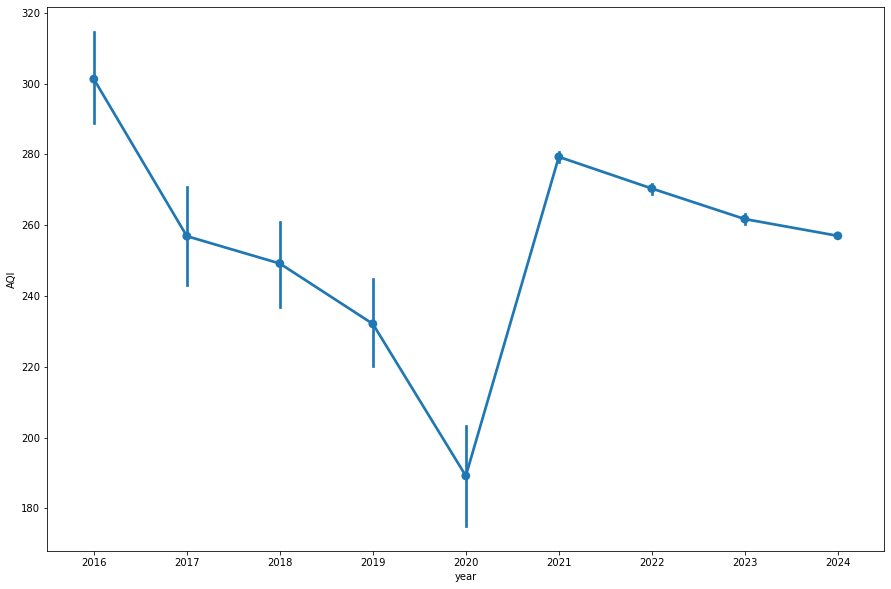

In [128]:
df['Date'] = pd.to_datetime(df['Date'],format='%y-%m-%d') # date parse
df['year'] = df['Date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>2015)]

data = df[['AQI','year','City']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

In [129]:
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
data=df[['AQI','Date']]
data["Date"] = pd.to_datetime(data['Date'])
data.tail(20)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,AQI,Date
9907,270.658737,2022-06-25
9908,269.960842,2022-07-25
9909,269.262947,2022-08-24
9910,268.565053,2022-09-23
9911,267.867158,2022-10-23
9912,267.029684,2022-11-22
9913,266.331790,2022-12-22
9914,265.633895,2023-01-21
9915,264.936000,2023-02-20
9916,264.238105,2023-03-22


In [130]:
data=data.set_index('Date').resample('W')["AQI"].mean()
data.tail()

Date
2023-12-24       NaN
2023-12-31       NaN
2024-01-07       NaN
2024-01-14       NaN
2024-01-21    256.98
Freq: W-SUN, Name: AQI, dtype: float64

In [131]:
df=data.reset_index(level=0, inplace=False)
df = df[np.isfinite(df['AQI'])]
df = df.reset_index(drop=True)
df.tail()

,Date,AQI
293,2023-09-24,259.911158
294,2023-10-22,259.213263
295,2023-11-19,258.375789
296,2023-12-17,257.677895
297,2024-01-21,256.980000


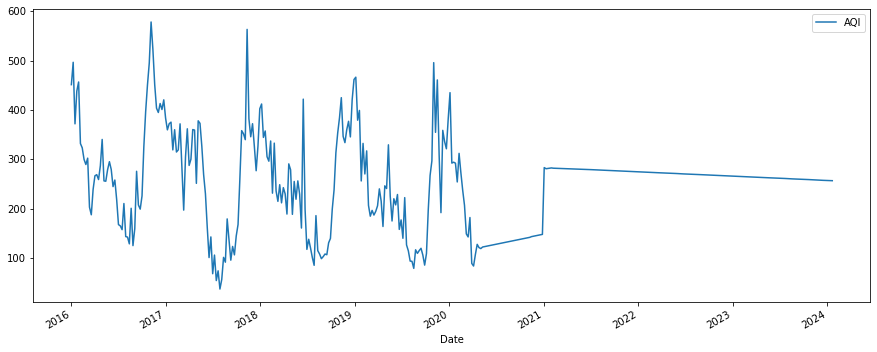

In [132]:
data=df.set_index('Date')
data.sort_values(by='Date',ascending=False)
data.plot(figsize=(15, 6))
plt.show()
y=data.AQI

In [133]:
n = data.shape[0]
train_size = 0.65

features_dataframe = data.sort_values('Date')
train = data.iloc[:int(n * train_size)]
test = data.iloc[int(n * train_size):]

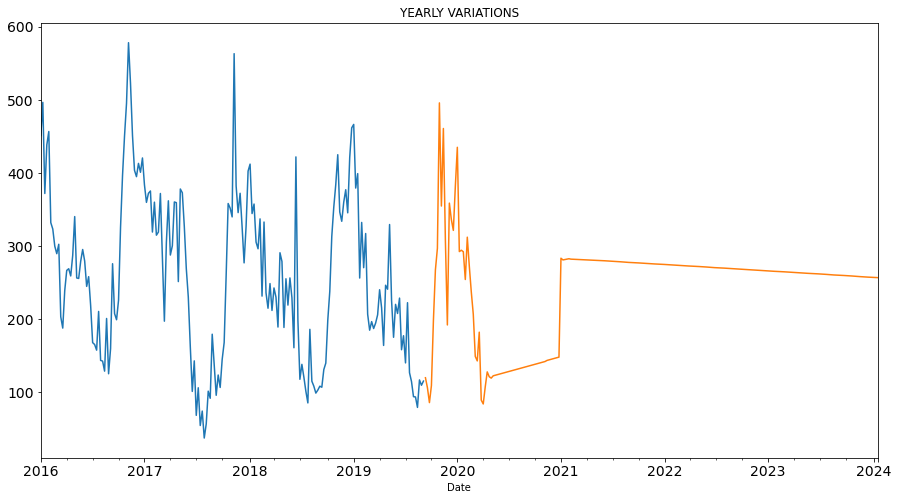

In [134]:
train.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
plt.show()

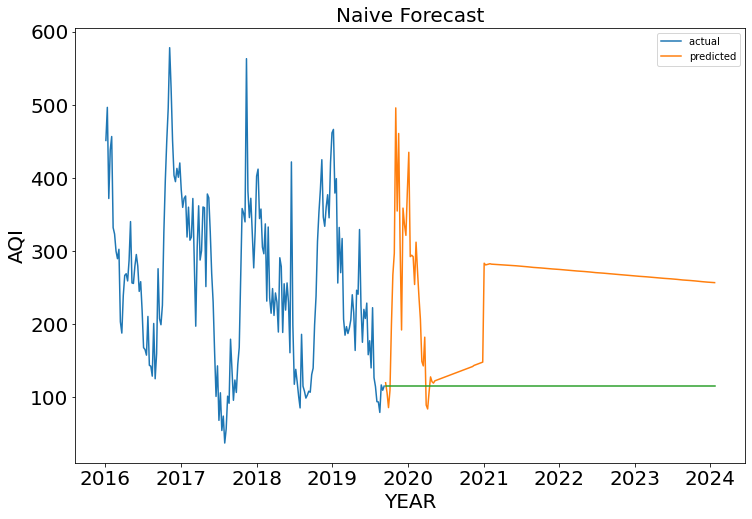

In [135]:
dd= np.asarray(train.AQI)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AQI'], label='Train')
plt.plot(test.index,test['AQI'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=20)

plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()


In [136]:
data=df[['AQI','Date']]

data['Date']=pd.to_datetime(df['Date'])
date=df.groupby(pd.Grouper(key='Date',freq='1MS'))["AQI"].mean()
df.count()

Date    298
AQI     298
dtype: int64

In [137]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['week']= df['Date'].dt.week
df=df[['AQI','Date','month','year','day','week']]
df.tail()

,AQI,Date,month,year,day,week
293,259.911158,2023-09-24,9,2023,24,38
294,259.213263,2023-10-22,10,2023,22,42
295,258.375789,2023-11-19,11,2023,19,46
296,257.677895,2023-12-17,12,2023,17,50
297,256.980000,2024-01-21,1,2024,21,3


In [138]:
data = df[['AQI','week']].groupby(["week"]).mean().reset_index().sort_values(by='week',ascending=False)
data=data.dropna()
dd=data
data.describe()

,week,AQI
count,53.000000,53.000000
mean,27.000000,244.143271
std,15.443445,79.306553
min,1.000000,114.545729
25%,14.000000,172.788366
50%,27.000000,239.608201
75%,40.000000,309.635870
max,53.000000,408.556634


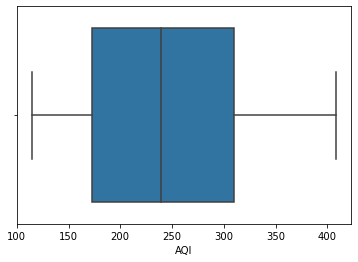

In [139]:
import seaborn as sns
sns.boxplot(x=data['AQI'])

In [140]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >140]
df=df[df.AQI <320]


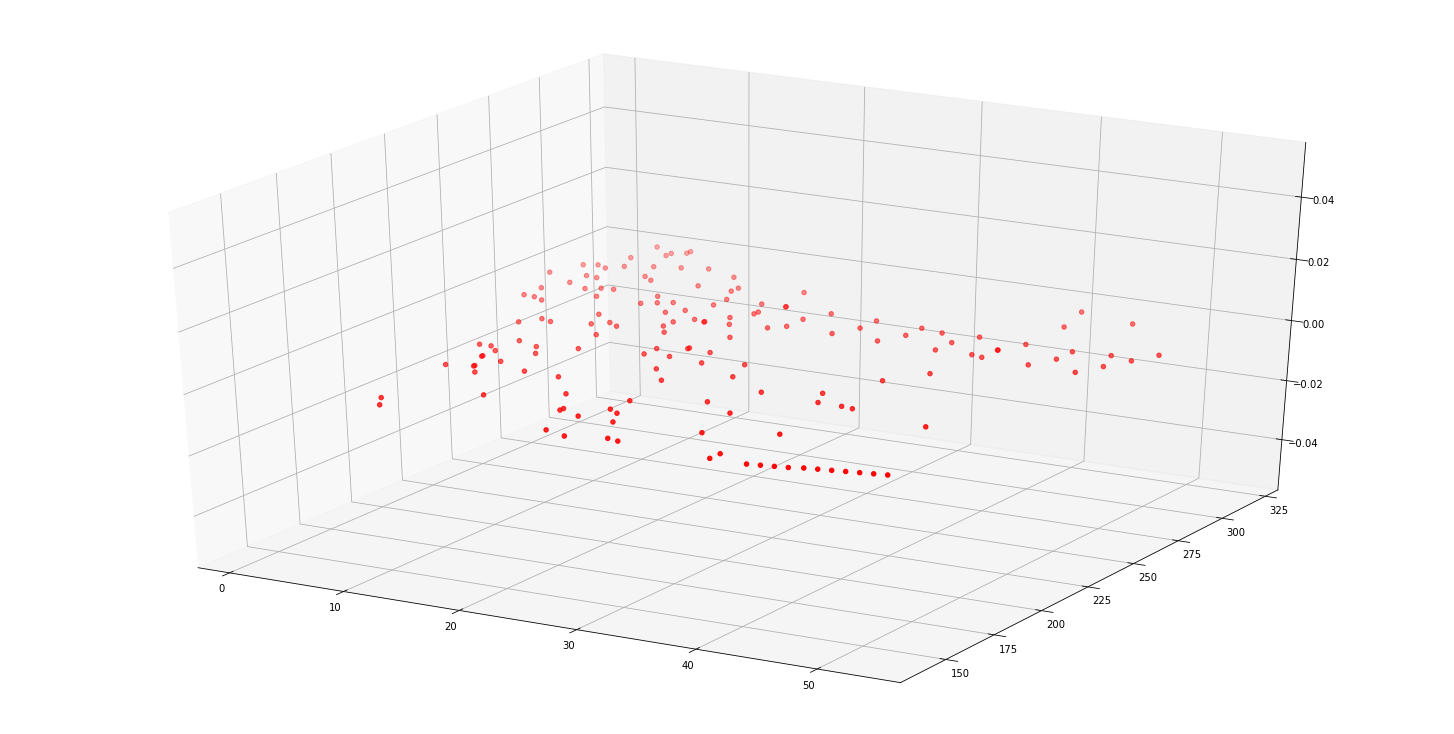

In [141]:
week=df['week'].values
AQI=df['AQI'].values
df['AQI']=pd.to_numeric(df['AQI'],errors='coerce')
df['week']=pd.to_numeric(df['week'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(week,AQI, color='red')
plt.show()

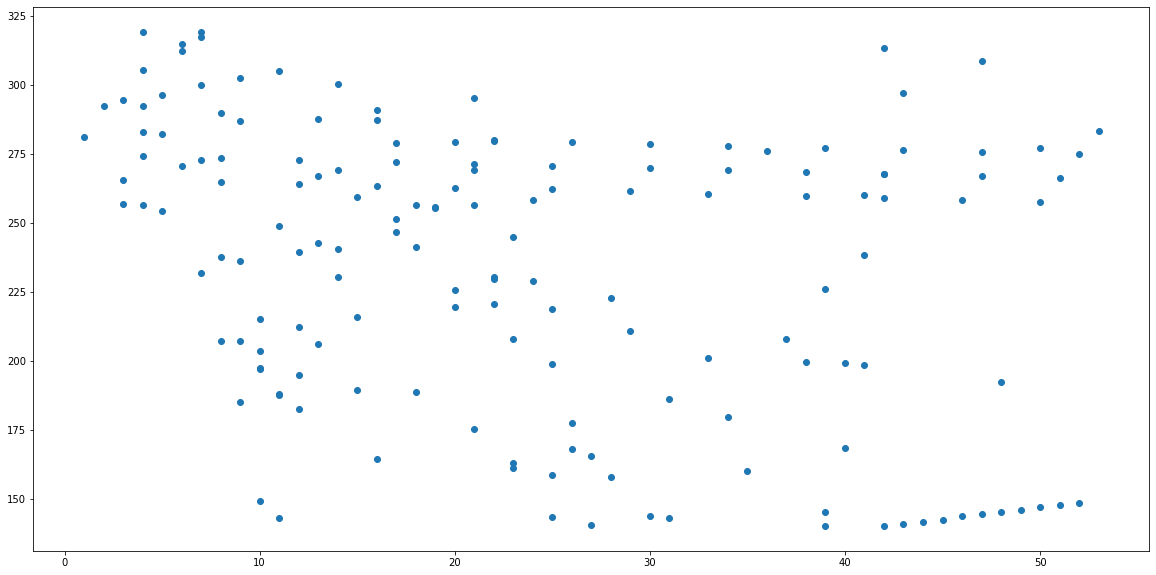

In [142]:
#scatter plot of data points
cols =['week']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [143]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.13256611],
       [ 1.        , -1.06393882],
       [ 1.        , -0.99531153],
       [ 1.        , -0.92668424],
       [ 1.        , -0.85805694],
       [ 1.        , -0.78942965],
       [ 1.        , -0.72080236],
       [ 1.        , -0.65217507],
       [ 1.        , -0.58354778],
       [ 1.        , -0.51492049],
       [ 1.        , -0.37766591],
       [ 1.        , -0.30903862],
       [ 1.        , -0.24041133],
       [ 1.        , -0.17178404],
       [ 1.        , -0.10315675],
       [ 1.        , -0.03452945],
       [ 1.        ,  0.03409784],
       [ 1.        ,  0.10272513],
       [ 1.        ,  0.17135242],
       [ 1.        ,  0.23997971],
       [ 1.        ,  0.308607  ],
       [ 1.        ,  0.37723429],
       [ 1.        ,  0.44586158],
       [ 1.        ,  0.51448887],
       [ 1.        ,  0.65174345],
       [ 1.        ,  0.78899804],
       [ 1.        ,  0.85762533],
       [ 1.        ,  0.92625262],
       [ 1.        ,

In [144]:
# Applying GRADIENT DESCENT 

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 234.64, -16.74


In [145]:
#Predicted val
newB=[ 223.90, -26.52]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse

   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x
x

,AQI,Date,month,year,day,week,Actual,Predicted
7,300.000000,2016-02-21,2,2016,21,7,300.000000,253.935653
8,289.714286,2016-02-28,2,2016,28,8,289.714286,252.115657
9,302.571429,2016-03-06,3,2016,6,9,302.571429,250.295662
10,203.428571,2016-03-13,3,2016,13,10,203.428571,248.475666
11,188.000000,2016-03-20,3,2016,20,11,188.000000,246.655670
...,...,...,...,...,...,...,...,...
293,259.911158,2023-09-24,9,2023,24,38,259.911158,197.515785
294,259.213263,2023-10-22,10,2023,22,42,259.213263,190.235802
295,258.375789,2023-11-19,11,2023,19,46,258.375789,182.955819
296,257.677895,2023-12-17,12,2023,17,50,257.677895,175.675836


In [146]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

50.994528276900795


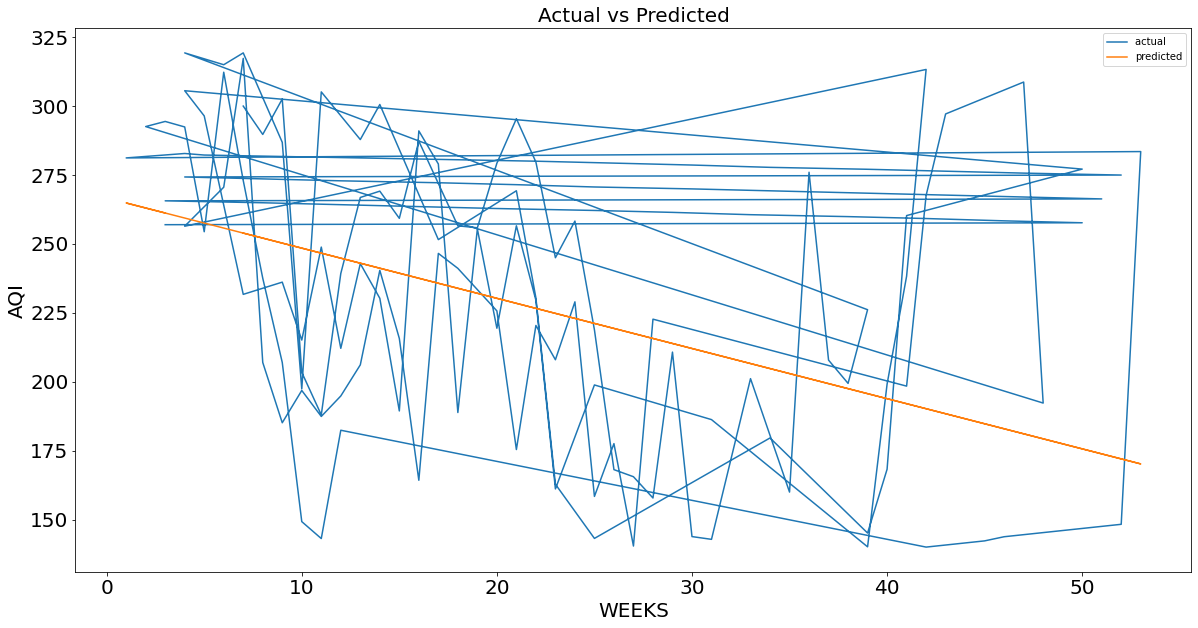

In [147]:
x_axis=x.week
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("WEEKS",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [148]:
df=dd[['week','AQI']]

df=df[df.week>25]
df.describe()

,week,AQI
count,28.000000,28.000000
mean,39.500000,230.586844
std,8.225975,95.125706
min,26.000000,114.545729
25%,32.750000,146.241846
50%,39.500000,180.505797
75%,46.250000,317.845005
max,53.000000,401.574403


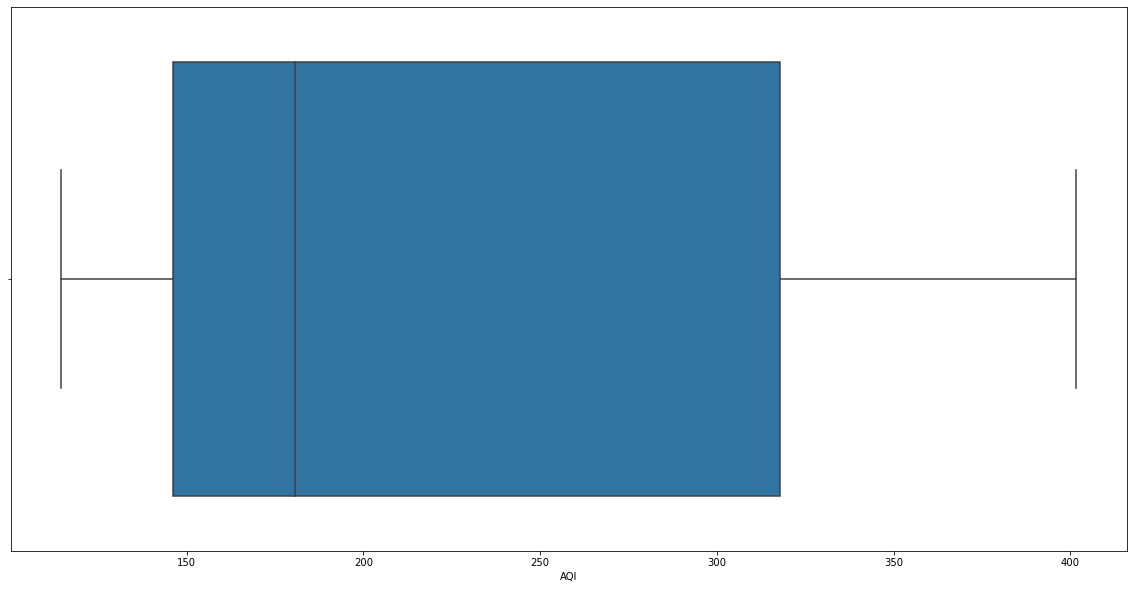

In [149]:
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [150]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >140]
df=df[df.AQI <300]
df

,week,AQI
49,50,294.104733
47,48,293.003916
46,47,297.079014
41,42,293.834538
40,41,246.573462
39,40,188.223227
38,39,168.740721
37,38,172.788366
35,36,146.365143
33,34,171.795078


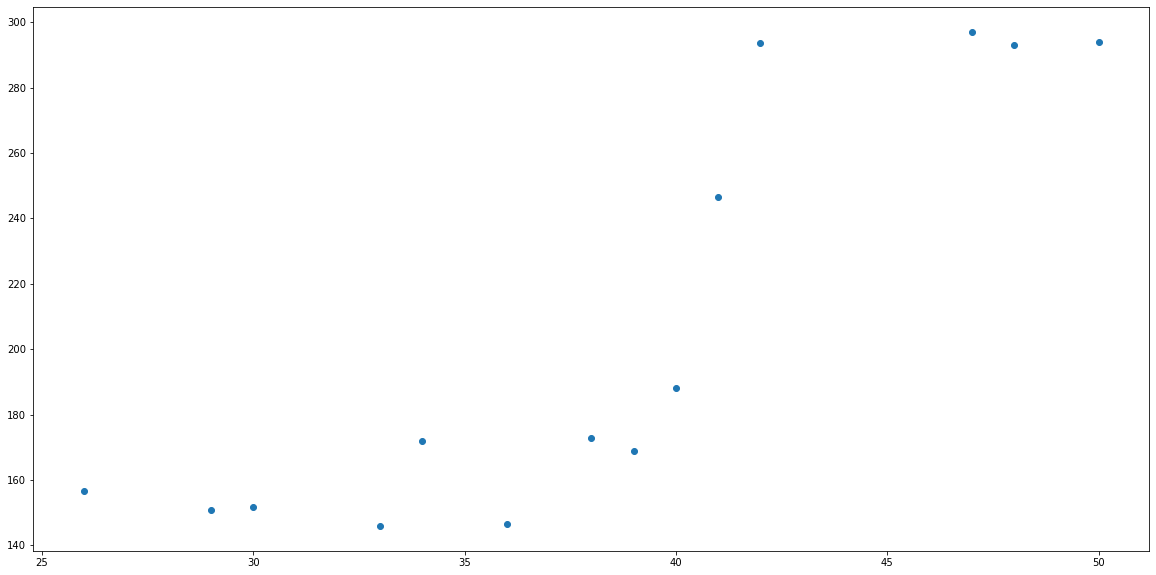

In [151]:
cols =['week']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [152]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.63860024],
       [ 1.        ,  1.36386487],
       [ 1.        ,  1.22649718],
       [ 1.        ,  0.53965876],
       [ 1.        ,  0.40229108],
       [ 1.        ,  0.26492339],
       [ 1.        ,  0.12755571],
       [ 1.        , -0.00981198],
       [ 1.        , -0.28454735],
       [ 1.        , -0.55928272],
       [ 1.        , -0.6966504 ],
       [ 1.        , -1.10875345],
       [ 1.        , -1.24612114],
       [ 1.        , -1.65822419]])

In [153]:

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 205.55, 55.23


In [154]:
import numpy as np
newB=[ 204.25, 58.64]

def rmse(y,y_pred):
    rmse= (np.sqrt(np.mean((y-y_pred)**2)))
    return rmse
   
y_pred=x.dot(newB)
dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,week,AQI,Actual,Predicted
49,50,294.104733,294.104733,300.337518
47,48,293.003916,293.003916,284.227036
46,47,297.079014,297.079014,276.171795
41,42,293.834538,293.834538,235.895590
40,41,246.573462,246.573462,227.840349
39,40,188.223227,188.223227,219.785108
38,39,168.740721,168.740721,211.729867
37,38,172.788366,172.788366,203.674626
35,36,146.365143,146.365143,187.564144
33,34,171.795078,171.795078,171.453662


In [155]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

30.55605806348179


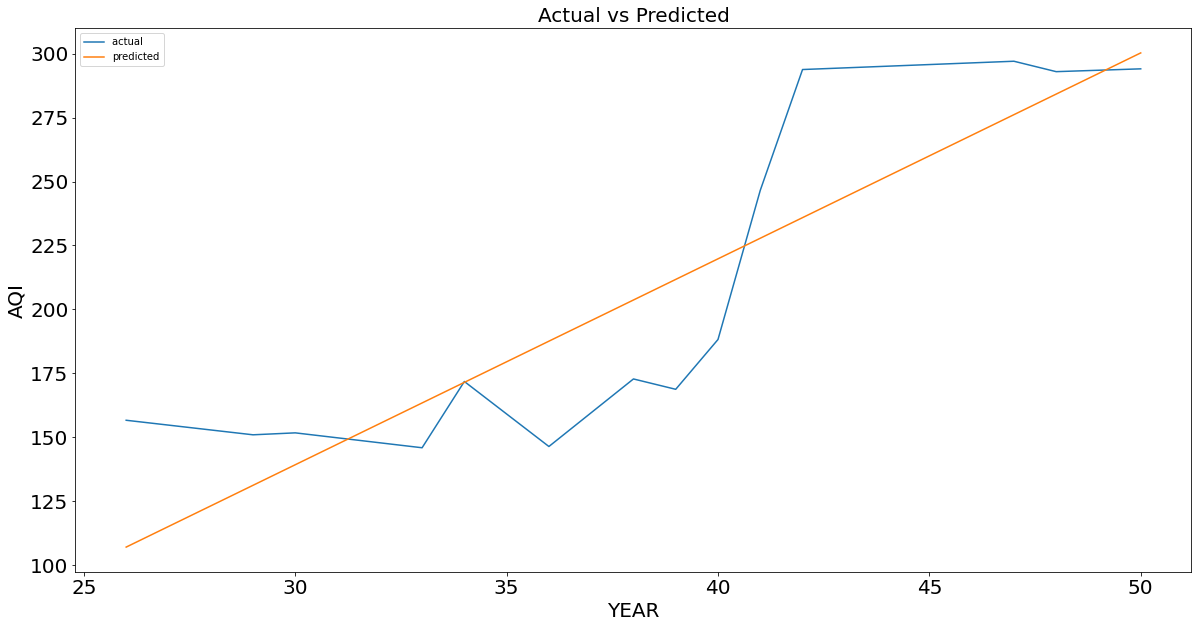

In [156]:
x_axis=x.week
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [157]:
df= dd[['week','AQI']]

df=df[df.week>35]
df.describe()

,week,AQI
count,18.000000,18.000000
mean,44.500000,280.021329
std,5.338539,83.490273
min,36.000000,139.058235
25%,40.250000,202.810786
50%,44.500000,295.591873
75%,48.750000,336.496593
max,53.000000,401.574403


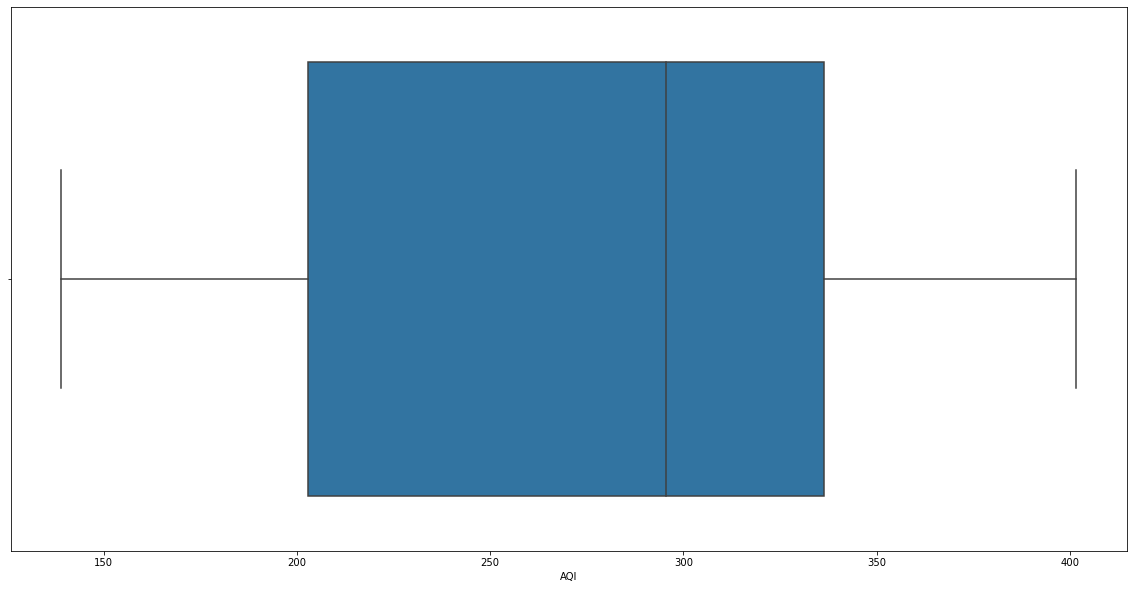

In [158]:
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [159]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >200]
df=df[df.AQI <350]
df.head()

,week,AQI
51,52,342.215947
50,51,317.410340
49,50,294.104733
48,49,324.325580
47,48,293.003916


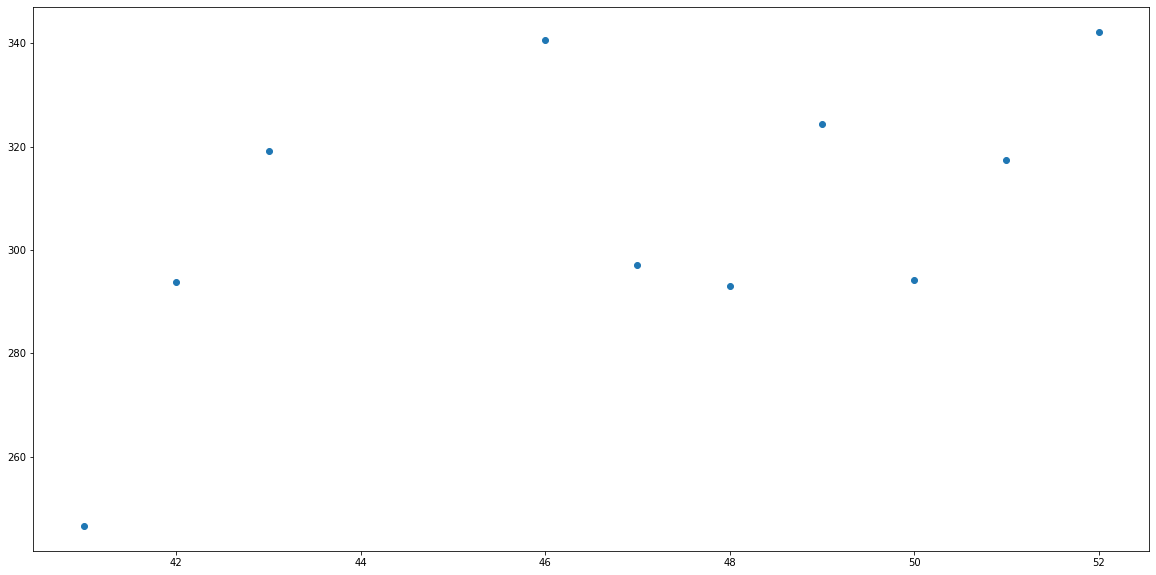

In [160]:
cols =['week']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [161]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.32717729],
       [ 1.        ,  1.06694645],
       [ 1.        ,  0.80671561],
       [ 1.        ,  0.54648476],
       [ 1.        ,  0.28625392],
       [ 1.        ,  0.02602308],
       [ 1.        , -0.23420776],
       [ 1.        , -1.01490028],
       [ 1.        , -1.27513112],
       [ 1.        , -1.53536196]])

In [162]:

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 306.83, 15.78


In [163]:
import numpy as np
newB=[ 304.24, 13.26]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,week,AQI,Actual,Predicted
51,52,342.215947,342.215947,321.838371
50,51,317.410340,317.410340,318.387710
49,50,294.104733,294.104733,314.937049
48,49,324.325580,324.325580,311.486388
47,48,293.003916,293.003916,308.035727
46,47,297.079014,297.079014,304.585066
45,46,340.553598,340.553598,301.134405
42,43,319.148999,319.148999,290.782422
41,42,293.834538,293.834538,287.331761
40,41,246.573462,246.573462,283.881100


In [164]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

22.56104760447141


In [165]:
df= dd[['week','AQI']]

#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.week>47]
df.describe()

,week,AQI
count,6.000000,6.000000
mean,50.500000,323.079531
std,1.870829,28.669698
min,48.000000,293.003916
25%,49.250000,299.931135
50%,50.500000,320.867960
75%,51.750000,337.743355
max,53.000000,367.416667


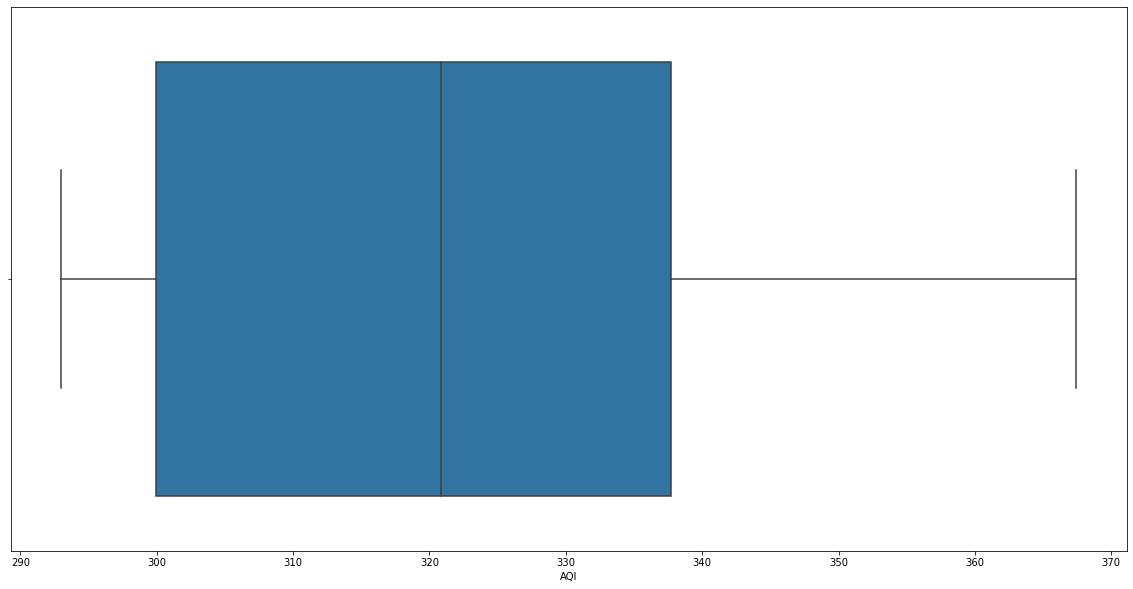

In [166]:
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [167]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >300]
df=df[df.AQI <347]
df.head()

,week,AQI
51,52,342.215947
50,51,317.410340
48,49,324.325580


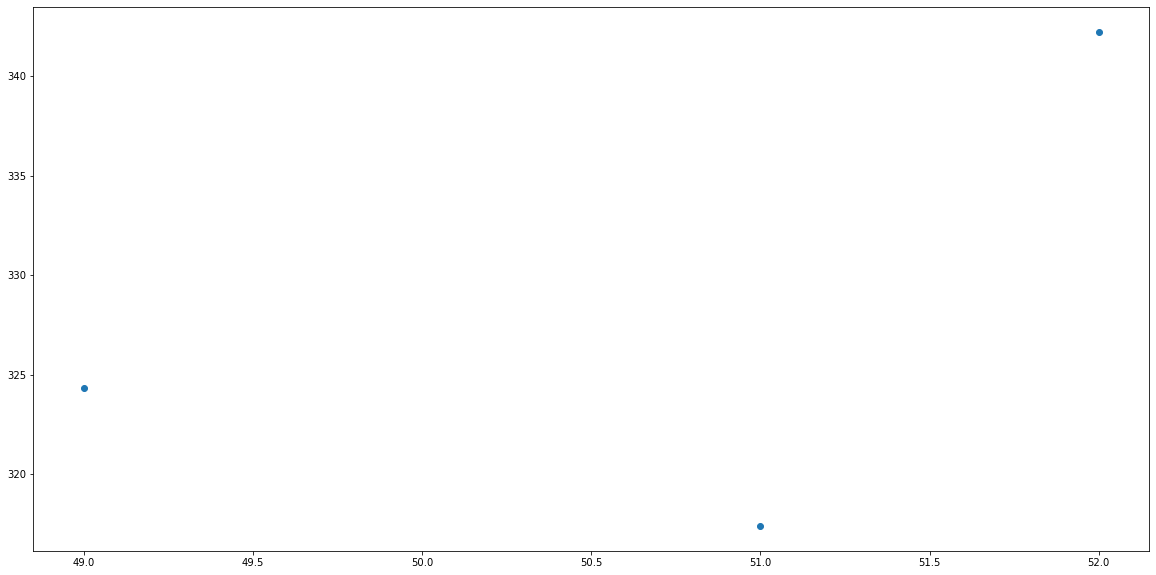

In [168]:
cols =['week']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [169]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  0.87287156],
       [ 1.        ,  0.21821789],
       [ 1.        , -1.09108945]])

In [170]:

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 327.98, 7.05


In [171]:
import numpy as np
newB=[ 317.78, 1.65]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,week,AQI,Actual,Predicted
51,52,342.215947,342.215947,319.220238
50,51,317.410340,317.410340,318.140060
48,49,324.325580,324.325580,315.979702


In [172]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

14.130213563503395


In [173]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
data=[[-1,251],[-1,256],[-1,260],[-1,265],[-1,270],[-1,276],[-1,281],[-1,286],[-1,292],[-1,297],[-1,302],[-1,307],[-1,312],[-1,317],[-1,322],[-1,327],[-1,332],[-1,337],[-1,343],[-1,348],[-1,353],[-1,358],[-1,363],[-1,369],[-1,374],[-1,379],[-1,384],[-1,389],[-1,394],[-1,399],[-1,404],[-1,409],[-1,415],[-1,420],[-1,425],[-1,431],[-1,436],[-1,441]]

In [175]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(data)
x=scaler.transform(data)
x

array([[-1.        , -1.        ],
       [-1.        , -0.94736842],
       [-1.        , -0.90526316],
       [-1.        , -0.85263158],
       [-1.        , -0.8       ],
       [-1.        , -0.73684211],
       [-1.        , -0.68421053],
       [-1.        , -0.63157895],
       [-1.        , -0.56842105],
       [-1.        , -0.51578947],
       [-1.        , -0.46315789],
       [-1.        , -0.41052632],
       [-1.        , -0.35789474],
       [-1.        , -0.30526316],
       [-1.        , -0.25263158],
       [-1.        , -0.2       ],
       [-1.        , -0.14736842],
       [-1.        , -0.09473684],
       [-1.        , -0.03157895],
       [-1.        ,  0.02105263],
       [-1.        ,  0.07368421],
       [-1.        ,  0.12631579],
       [-1.        ,  0.17894737],
       [-1.        ,  0.24210526],
       [-1.        ,  0.29473684],
       [-1.        ,  0.34736842],
       [-1.        ,  0.4       ],
       [-1.        ,  0.45263158],
       [-1.        ,

In [189]:
newB=[270.24, 13.26]
ypred=-(x.dot(newB))

yy=ypred[0:12]

In [190]:
pred=['AQI for January 2021==>','AQI for February 2021==>','AQI for March 2021==>','AQI for April 2021==>','AQI for May 2021==>','AQI for June 2021==>','AQI for July 2021==>','AQI for August 2021==>','AQI for September 2021==>','AQI for October 2021==>','AQI for November 2021==>','AQI for December 2021==>']

In [191]:
dataset = pd.DataFrame({'Month': pred[:]})

In [193]:
dataset['Predicted AQI']=yy[:]

In [194]:
dataset

,Month,Predicted AQI
0,AQI for January 2021==>,283.500000
1,AQI for February 2021==>,282.802105
2,AQI for March 2021==>,282.243789
3,AQI for April 2021==>,281.545895
4,AQI for May 2021==>,280.848000
5,AQI for June 2021==>,280.010526
6,AQI for July 2021==>,279.312632
7,AQI for August 2021==>,278.614737
8,AQI for September 2021==>,277.777263
9,AQI for October 2021==>,277.079368
